In [1]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [2]:

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 631.4 kB/s eta 0:00:001m503.0 kB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
print("hello world")


hello world


In [4]:
warnings.filterwarnings('ignore')

In [8]:

data = pd.read_csv('train.csv')


In [9]:
data.sample(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7318,7319,CA-2018-158120,17/11/2018,21/11/2018,Standard Class,KH-16330,Katharine Harms,Corporate,United States,Hillsboro,Oregon,97123.0,West,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,4.158
8428,8429,US-2018-132220,12/11/2018,16/11/2018,Standard Class,DJ-13510,Don Jones,Corporate,United States,Tempe,Arizona,85281.0,West,TEC-AC-10004227,Technology,Accessories,SanDisk Ultra 16 GB MicroSDHC Class 10 Memory ...,62.352
520,521,CA-2016-157812,22/03/2016,26/03/2016,Standard Class,DB-13210,Dean Braden,Consumer,United States,Houston,Texas,77041.0,Central,OFF-ST-10000736,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,129.568
4224,4225,CA-2017-108644,30/09/2017,03/10/2017,First Class,SJ-20215,Sarah Jordon,Consumer,United States,Quincy,Illinois,62301.0,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",1.964
8265,8266,CA-2015-131800,30/12/2015,04/01/2016,Standard Class,AJ-10960,Astrea Jones,Consumer,United States,New York City,New York,10035.0,East,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",35.448


In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [8]:
data.isna().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
postal_code_mode = data['Postal Code'].mode()[0]
data['Postal Code'].fillna(postal_code_mode, inplace=True)


In [12]:
import matplotlib.pyplot as plt


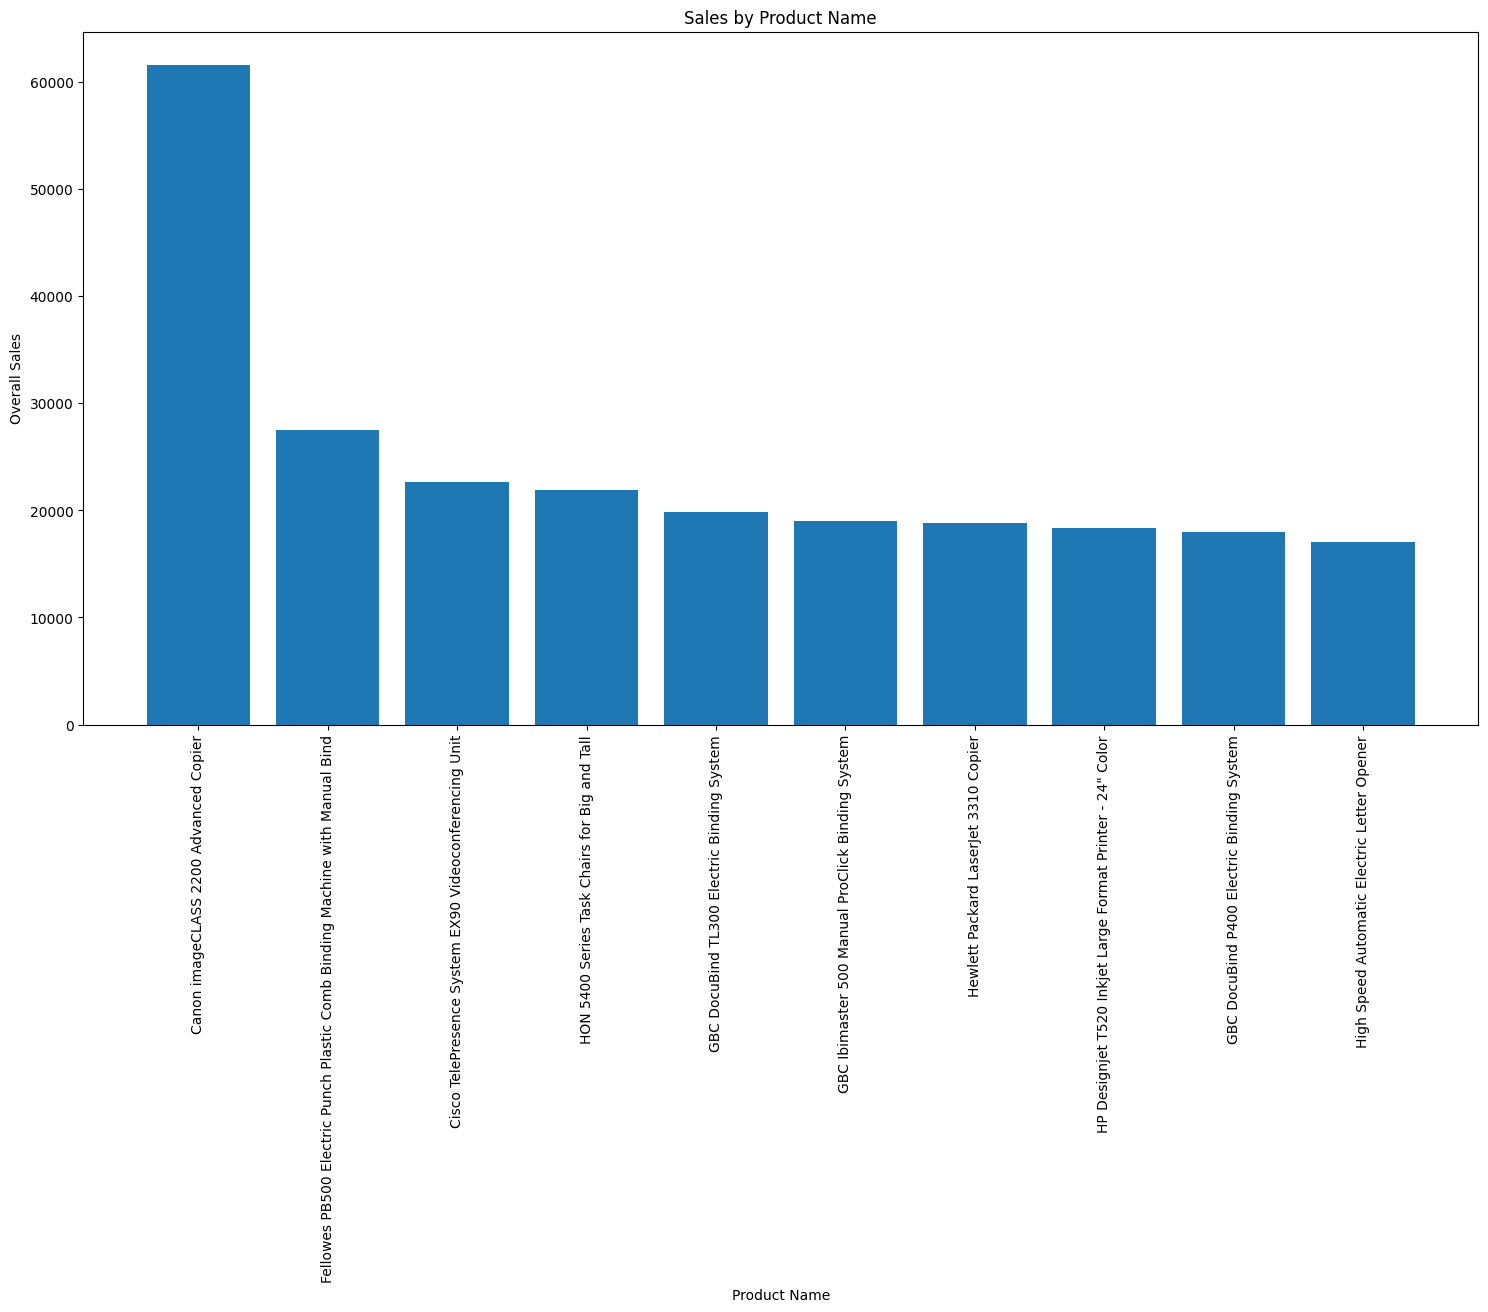

In [13]:
sales_by_product = data.groupby(by = data['Product Name'])['Sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize = (18,9))
plt.bar(sales_by_product['Product Name'] ,sales_by_product['Sales'])
plt.xticks(rotation = 90)
plt.xlabel("Product Name")
plt.ylabel("Overall Sales")
plt.title("Sales by Product Name")
plt.show()

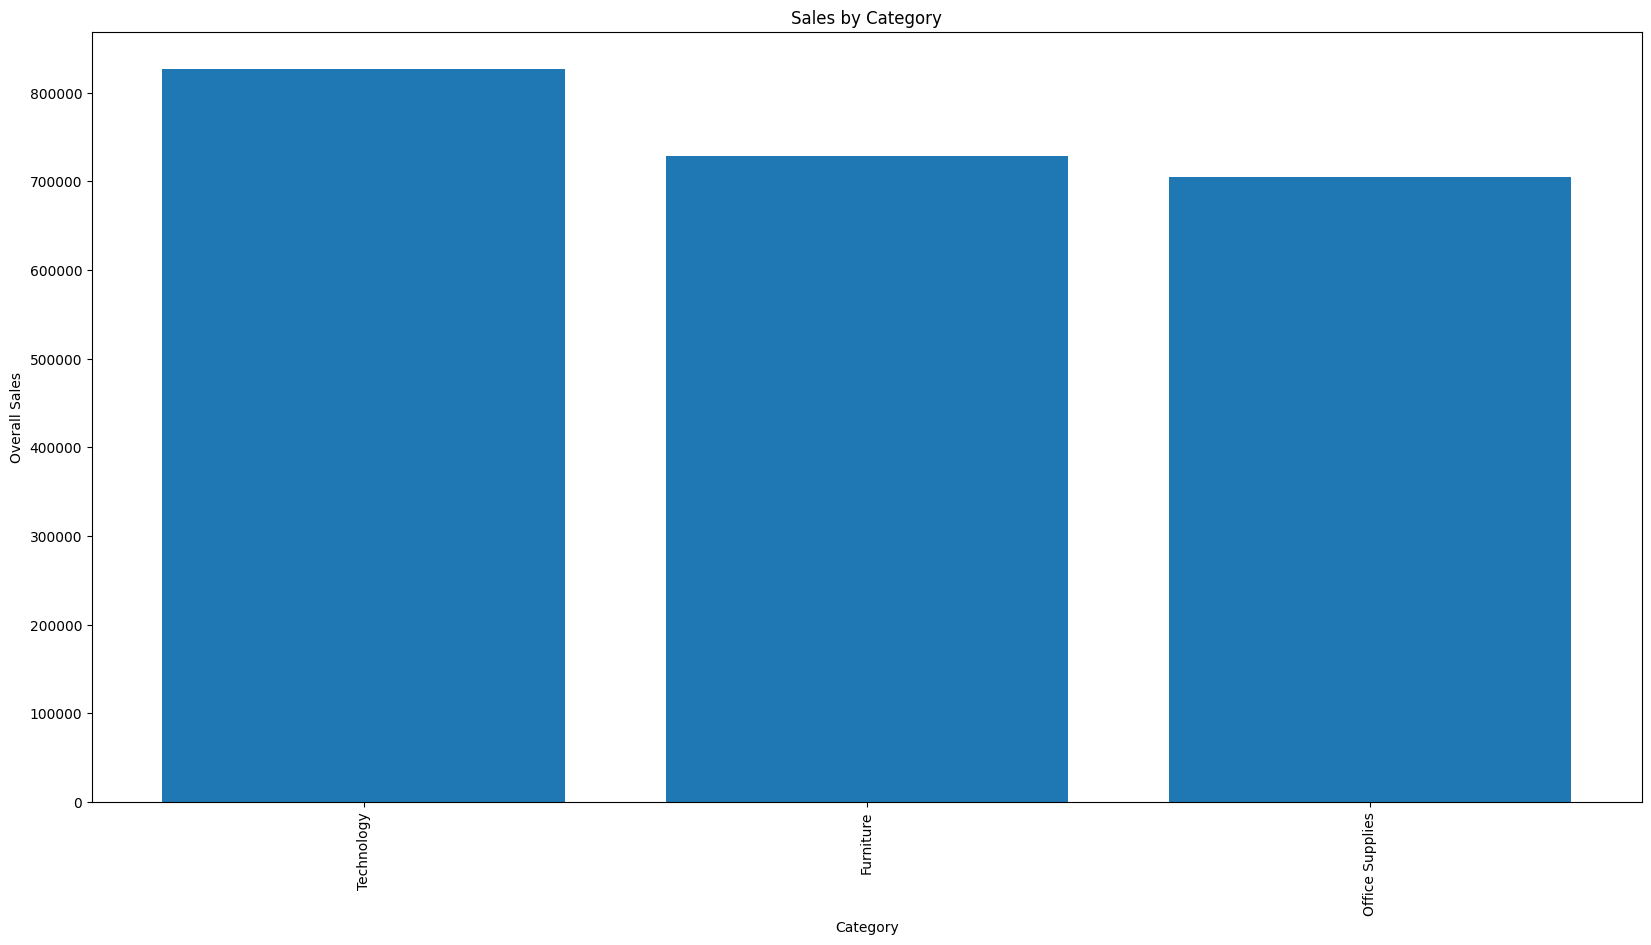

In [14]:
top10 = data.groupby(by = data['Category'])['Sales'].sum().reset_index()
top10 = top10.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize = (20,10))
plt.bar(top10['Category'] ,top10['Sales'])
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Overall Sales")
plt.title("Sales by Category")
plt.show()


In [15]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

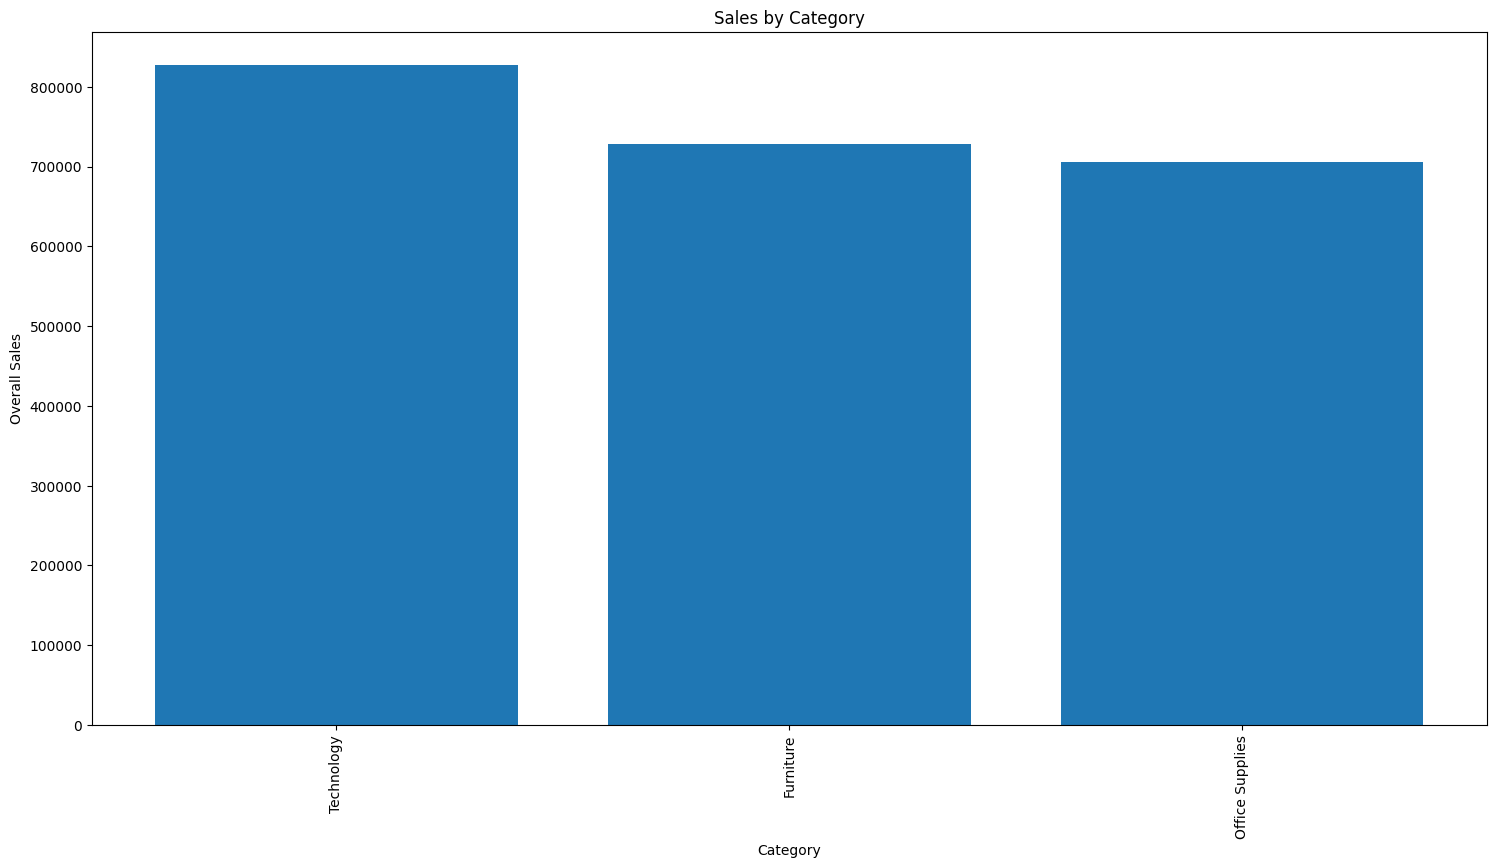

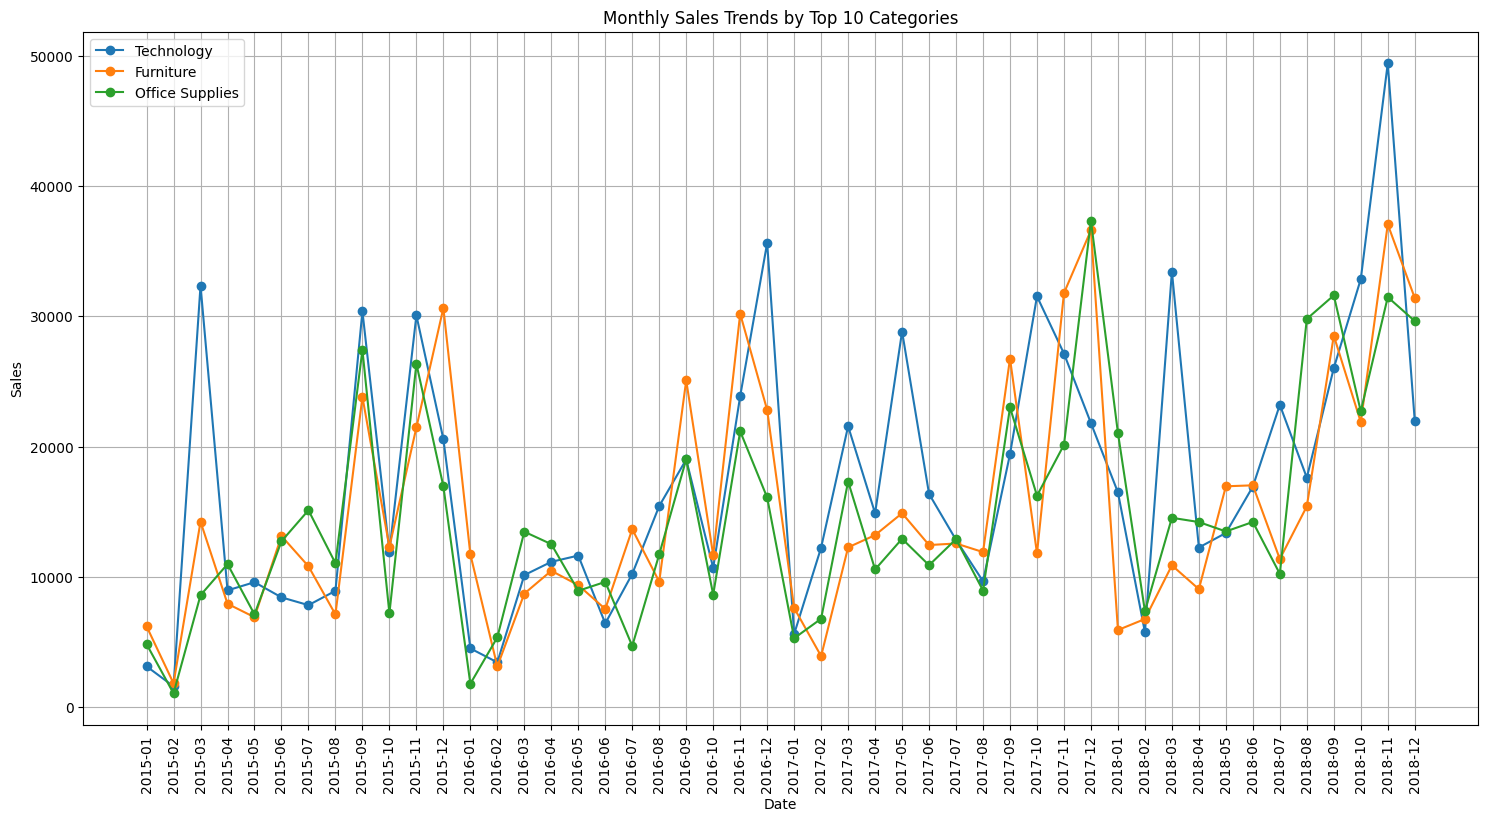

In [16]:
# Assuming retailDf is already defined and imported

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Calculate overall sales by category
top10 = data.groupby(by=data['Category'])['Sales'].sum().reset_index()
top10 = top10.sort_values(by='Sales', ascending=False).head(10)

# Plot the top 10 categories by overall sales
plt.figure(figsize=(18, 9))
plt.bar(top10['Category'], top10['Sales'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Overall Sales")
plt.title("Sales by Category")
plt.show()

# Extract month and year from Order Date
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
# Filter the dataframe to include only the top 10 categories
top10_list = top10['Category'].tolist()
filtered_data = data[data['Category'].isin(top10_list)]

# Aggregate sales data by month, year, and category
monthly_sales = filtered_data.groupby(['Order Year', 'Order Month', 'Category'])['Sales'].sum().reset_index()

# Rename columns to match expected format for datetime conversion
monthly_sales.rename(columns={'Order Year': 'year', 'Order Month': 'month'}, inplace=True)
monthly_sales['day'] = 1  # Add a day column

# Convert to datetime
monthly_sales['Order Year-Month'] = pd.to_datetime(monthly_sales[['year', 'month', 'day']])

# Convert Order Year-Month to string for plotting (optional, better to keep as datetime for proper sorting)
monthly_sales['Order Year-Month'] = monthly_sales['Order Year-Month'].dt.strftime('%Y-%m')

# Plot monthly sales trends for each of the top 10 categories
plt.figure(figsize=(18, 9))
for category in top10_list:
    category_sales = monthly_sales[monthly_sales['Category'] == category]
    plt.plot(category_sales['Order Year-Month'], category_sales['Sales'], marker='o', linestyle='-', label=category)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends by Top 10 Categories')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

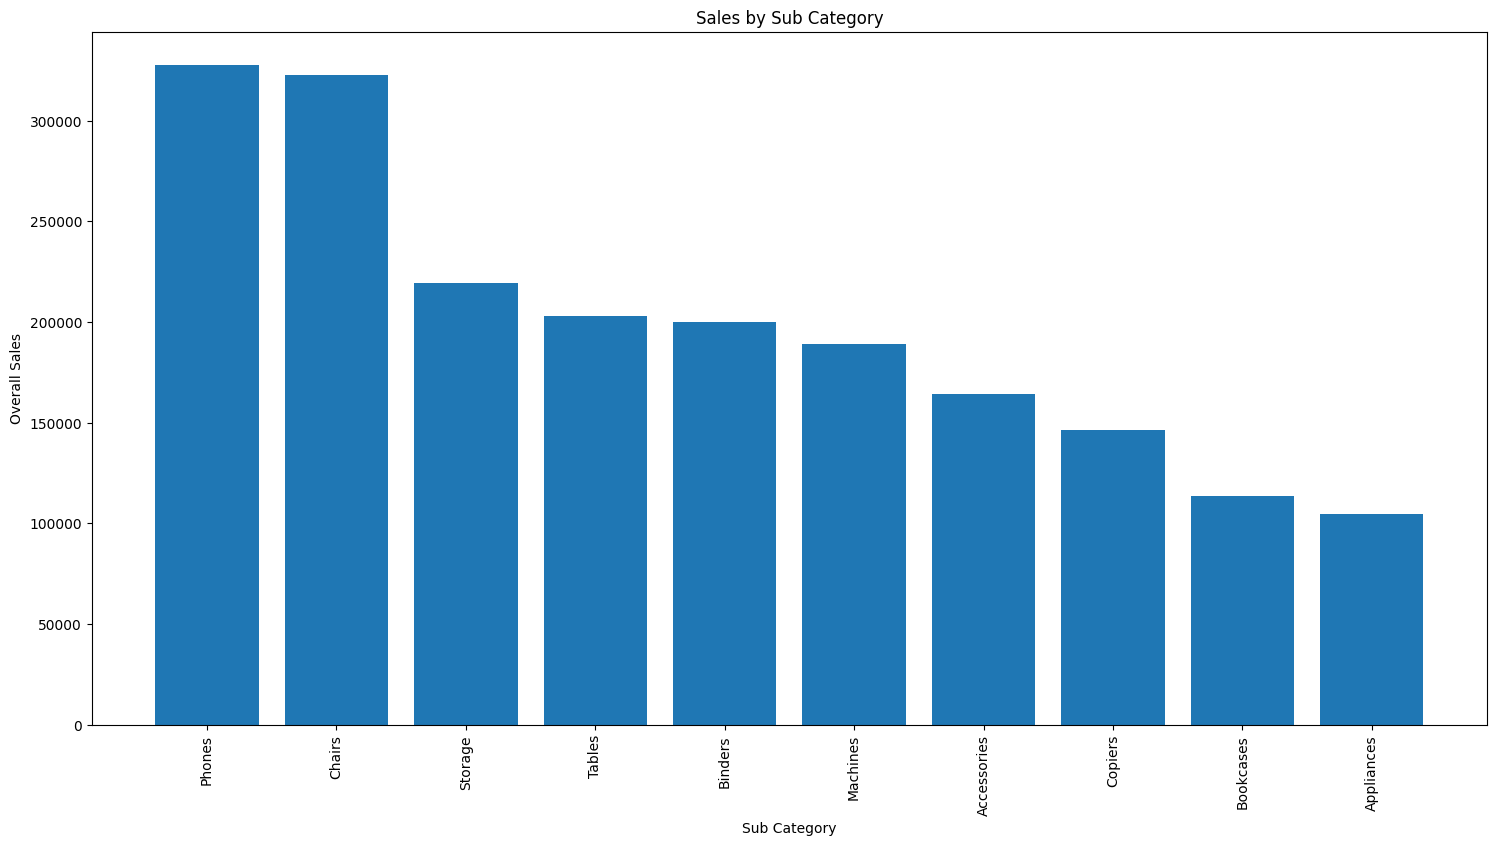

In [17]:
top10_Subcategories = data.groupby(by = data['Sub-Category'])['Sales'].sum().reset_index()
top10_Subcategories = top10_Subcategories.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize = (18,9))
plt.bar(top10_Subcategories['Sub-Category'] ,top10_Subcategories['Sales'])
plt.xticks(rotation = 90)
plt.xlabel("Sub Category")
plt.ylabel("Overall Sales")
plt.title("Sales by Sub Category")
plt.show()


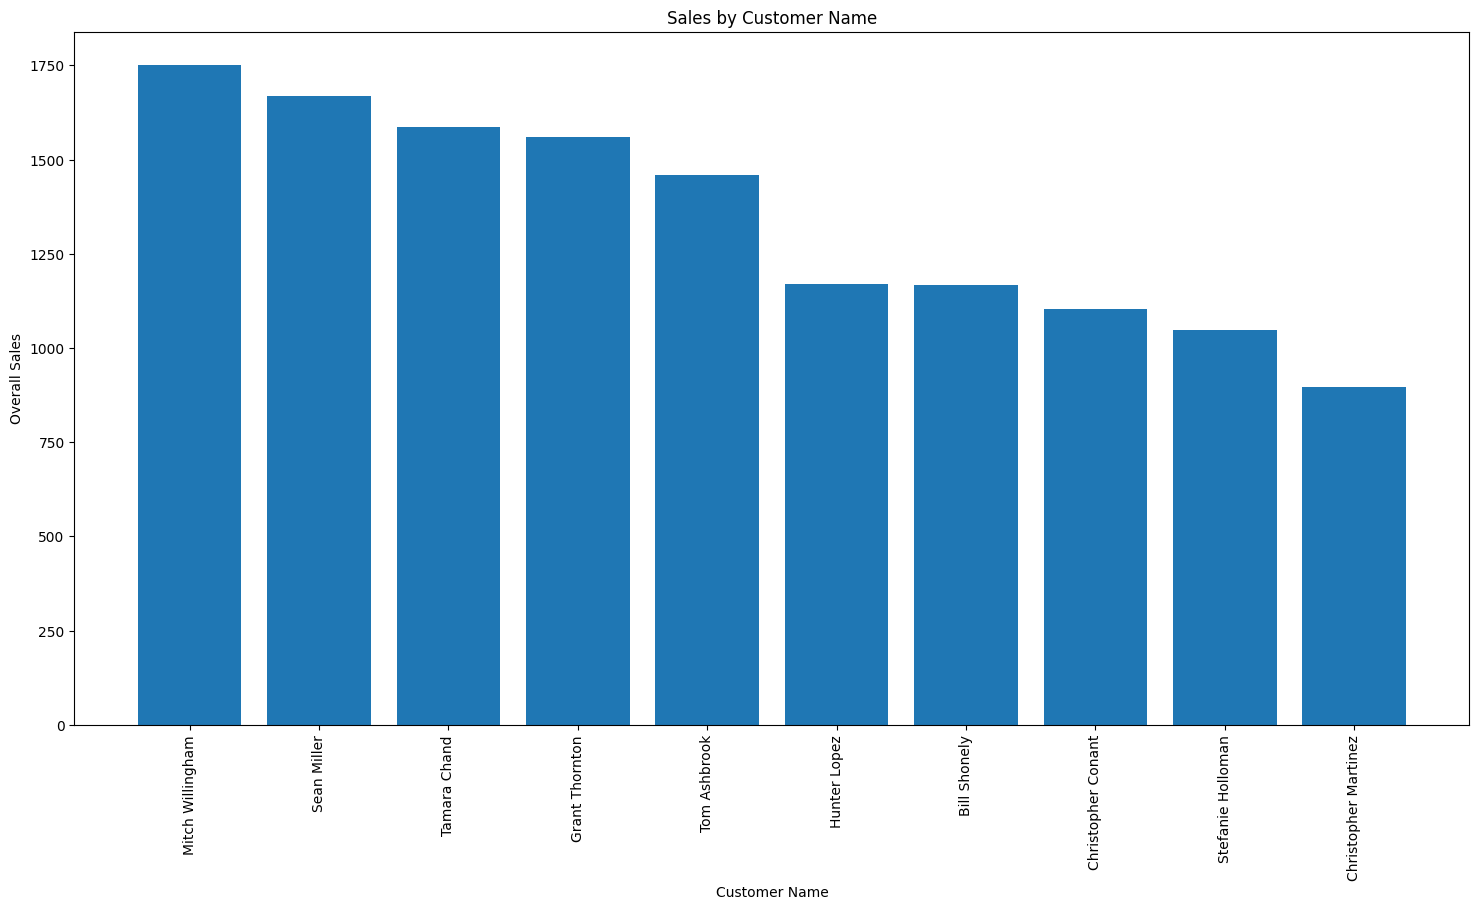

In [18]:
top10_Customer_by_AvgSales = data.groupby(by = data['Customer Name'])['Sales'].mean().reset_index()
top10_Customer_by_AvgSales = top10_Customer_by_AvgSales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize = (18,9))
plt.bar(top10_Customer_by_AvgSales['Customer Name'] ,top10_Customer_by_AvgSales['Sales'])
plt.xticks(rotation = 90)
plt.xlabel("Customer Name")
plt.ylabel("Overall Sales")
plt.title("Sales by Customer Name")
plt.show()


In [19]:
Avg_sales_per_customer = data.groupby(by = data['Customer Name'])['Sales'].mean().reset_index()
Avg_sales_per_customer

,Customer Name,Sales
0,Aaron Bergman,147.692667
1,Aaron Hawkins,158.609091
2,Aaron Smayling,305.069200
3,Adam Bellavance,430.867778
4,Adam Hart,162.516850
...,...,...
788,Xylona Preis,84.809214
789,Yana Sorensen,560.037000
790,Yoseph Carroll,681.793750
791,Zuschuss Carroll,258.893774


In [20]:
customer_sales_by_subCategory = data.pivot_table(values = 'Sales', index = 'Customer Name', columns = 'Sub-Category', aggfunc = 'sum' ).fillna(0)
customer_sales_by_subCategory


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Customer Name,,,,,,,,,,,,,,,,,
Aaron Bergman,0.000,0.000,17.940,0.000,341.960,48.712,0.000,0.000,0.000,0.000,0.00,0.000,0.000,221.980,255.564,0.000,0.000
Aaron Hawkins,34.770,0.000,18.704,59.320,0.000,279.456,0.000,247.840,0.000,86.450,18.90,0.000,8.000,668.160,323.100,0.000,0.000
Aaron Smayling,0.000,0.000,0.000,132.588,477.666,0.000,0.000,0.000,0.000,0.000,0.00,2135.682,102.068,0.000,31.400,0.000,171.288
Adam Bellavance,195.740,160.320,0.000,4404.216,0.000,449.568,0.000,0.000,0.000,127.880,0.00,0.000,353.106,0.000,0.000,27.930,2036.860
Adam Hart,165.600,2.220,15.848,850.163,0.000,314.352,0.000,0.000,17.900,442.130,5.22,0.000,135.648,0.000,0.000,422.616,878.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xylona Preis,245.154,291.036,142.110,101.630,0.000,0.000,0.000,15.520,15.260,811.298,0.00,0.000,672.090,0.000,80.560,0.000,0.000
Yana Sorensen,236.000,0.000,9.552,2828.028,0.000,436.704,0.000,98.460,0.000,65.940,0.00,0.000,0.000,0.000,2687.180,0.000,358.580
Yoseph Carroll,0.000,0.000,57.750,0.000,0.000,0.000,1199.976,0.000,0.000,124.410,0.00,0.000,57.620,329.584,3685.010,0.000,0.000


In [21]:
customer_max_subCategory = customer_sales_by_subCategory.idxmax(axis=1)
customer_max_subCategory = customer_max_subCategory.reset_index() 
customer_max_subCategory.columns = ['Customer Name', 'Max Sub-Category']
customer_max_subCategory

,Customer Name,Max Sub-Category
0,Aaron Bergman,Bookcases
1,Aaron Hawkins,Phones
2,Aaron Smayling,Machines
3,Adam Bellavance,Binders
4,Adam Hart,Tables
...,...,...
788,Xylona Preis,Furnishings
789,Yana Sorensen,Binders
790,Yoseph Carroll,Storage
791,Zuschuss Carroll,Tables


In [22]:
customer_segments = customer_max_subCategory.groupby('Max Sub-Category')['Customer Name'].apply(list).reset_index()
customer_segments

,Max Sub-Category,Customer Name
0,Accessories,"[Aimee Bixby, Alice McCarthy, Allen Armold, An..."
1,Appliances,"[Annie Thurman, Anthony Jacobs, Art Ferguson, ..."
2,Art,"[Brendan Sweed, Carl Jackson, Corey Roper, Don..."
3,Binders,"[Adam Bellavance, Adrian Barton, Adrian Shami,..."
4,Bookcases,"[Aaron Bergman, Amy Hunt, Anna Gayman, Anthony..."
5,Chairs,"[Aleksandra Gannaway, Andy Yotov, Ann Blume, A..."
6,Copiers,"[Alan Dominguez, Alejandro Ballentine, Cari Sc..."
7,Envelopes,"[Nona Balk, Peter Bühler]"
8,Fasteners,[Roy Skaria]
9,Furnishings,"[Alejandro Grove, Anemone Ratner, Anthony Witt..."


In [23]:
customer_sales_by_Category = data.pivot_table(values = 'Sales', index = 'Customer Name', columns = 'Category', aggfunc = 'sum' ).fillna(0)
customer_max_category =  customer_sales_by_Category.idxmax(axis=1)
customer_max_category = customer_max_category.reset_index()
customer_max_category.columns = ['Customer Name','Max Category']
customer_segment_category = customer_max_category.groupby('Max Category')['Customer Name'].apply(list).reset_index()
customer_segment_category

,Max Category,Customer Name
0,Furniture,"[Aaron Bergman, Adam Hart, Adam Shillingsburg,..."
1,Office Supplies,"[Adam Bellavance, Adrian Barton, Adrian Hane, ..."
2,Technology,"[Aaron Hawkins, Aaron Smayling, Aimee Bixby, A..."


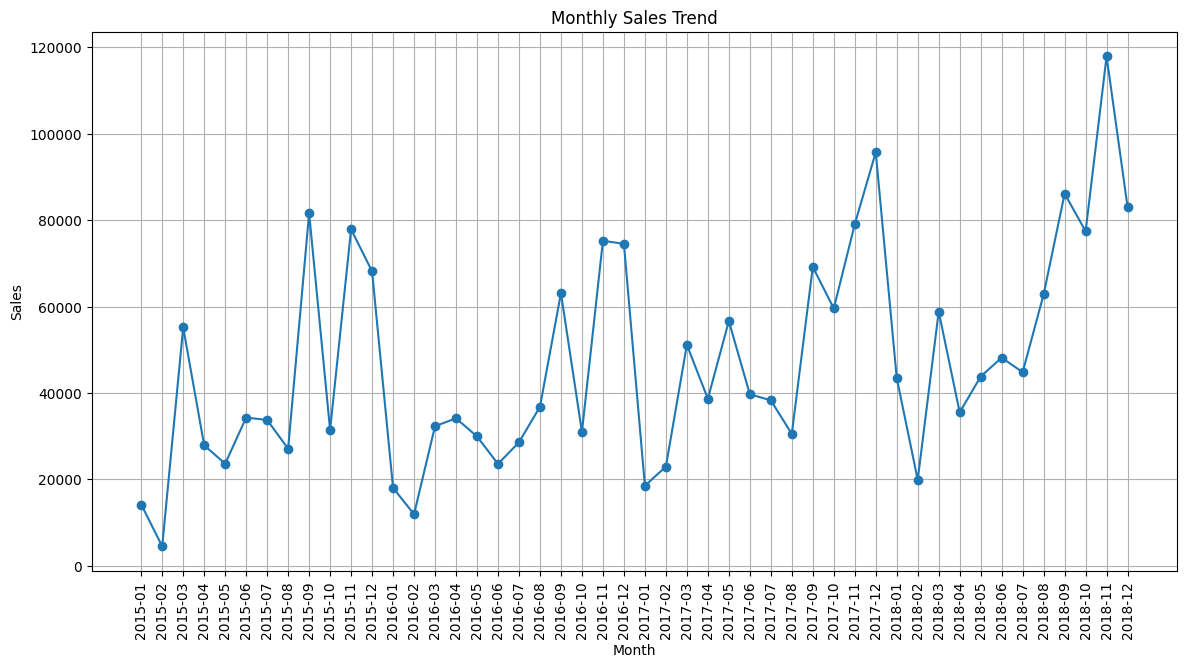

In [24]:
sales_by_month = data.groupby(by = data['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

plt.figure(figsize=(14,7))
plt.plot(sales_by_month['Order Date'].astype(str), sales_by_month['Sales'], marker = 'o', linestyle = '-')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

In [25]:
highest_sales_month = sales_by_month[sales_by_month['Sales'] == sales_by_month['Sales'].max()]
lowest_sales_month = sales_by_month[sales_by_month['Sales'] == sales_by_month['Sales'].min()]
print("Highest Sales Month : " , highest_sales_month)
print("Lowest Sales Month: ", lowest_sales_month)

Highest Sales Month :     Order Date       Sales
46    2018-11  117938.155
Lowest Sales Month:    Order Date     Sales
1    2015-02  4519.892


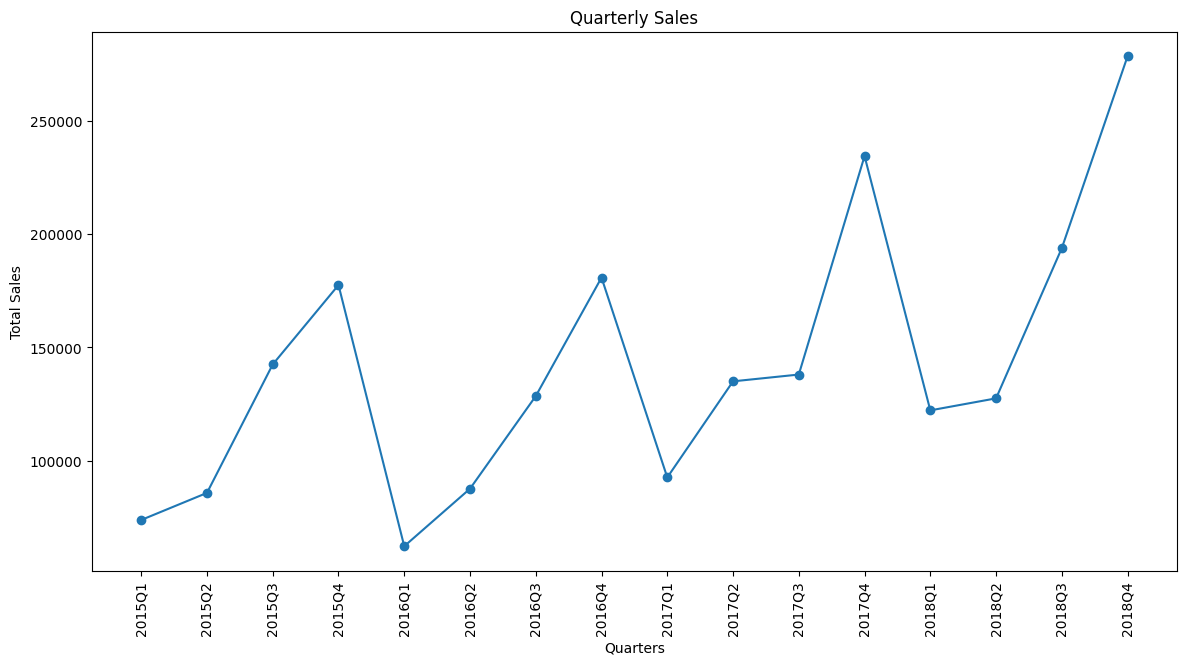

In [26]:
Quarterly_sales = data.groupby(by=data['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()
plt.figure(figsize=(14,7))
plt.plot(Quarterly_sales['Order Date'].astype(str), Quarterly_sales['Sales'],marker = 'o', linestyle = '-')
plt.xticks(rotation = 90)
plt.xlabel("Quarters")
plt.ylabel("Total Sales")
plt.title("Quarterly Sales")
plt.show()


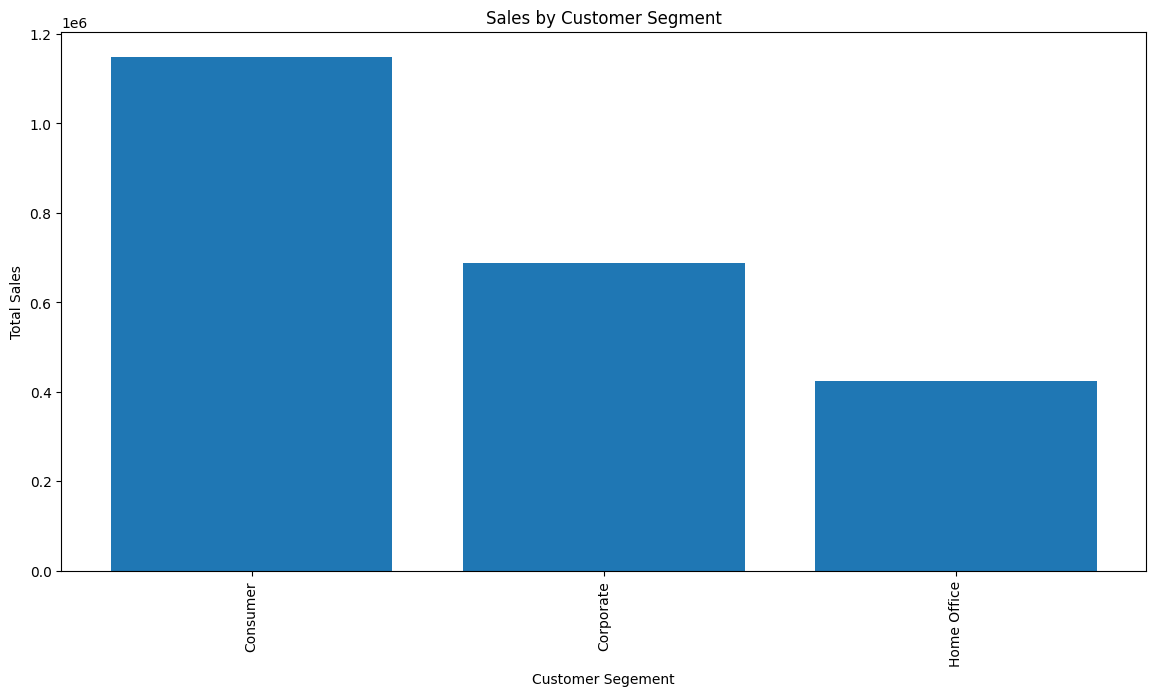

In [27]:
customer_segmented_Sales = data.groupby(by=data['Segment'])['Sales'].sum().reset_index()
plt.figure(figsize=(14,7))
plt.bar(customer_segmented_Sales['Segment'], customer_segmented_Sales['Sales'])
plt.xticks(rotation = 90)
plt.xlabel("Customer Segement")
plt.ylabel("Total Sales")
plt.title("Sales by Customer Segment")
plt.show()


In [28]:
region_category_sales = data.groupby(['Region', 'Category'])['Sales'].sum()
region_category_sales.unstack()

Category,Furniture,Office Supplies,Technology
Region,,,
Central,160317.4622,163590.243,168739.208
East,206461.3880,199940.811,263116.527
South,116531.4800,124424.771,148195.208
West,245348.2455,217466.509,247404.930


In [29]:
customer_purchase_counts = data.groupby('Customer ID')['Order ID'].nunique()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
total_customers = customer_purchase_counts.count()
repeat_purchase_rate = repeat_customers / total_customers
repeat_purchase_rate * 100

98.36065573770492

In [30]:
data['Delivery Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
average_delivery_time = data['Delivery Time (Days)'].mean()
average_delivery_time

3.9611224489795918

In [31]:
average_delivedry_time_region = data.groupby('Region')['Delivery Time (Days)'].mean()
average_delivedry_time_region

Region
Central    4.065876
East       3.910233
South      3.961202
West       3.930255
Name: Delivery Time (Days), dtype: float64

In [32]:
repeat_customers_id = customer_purchase_counts[customer_purchase_counts > 1].index
data['Repeat Customer'] = data['Customer ID'].isin(repeat_customers_id)
average_delivery_time_by_repeat_status = data.groupby('Repeat Customer')['Delivery Time (Days)'].mean().reset_index()
average_delivery_time_by_repeat_status

,Repeat Customer,Delivery Time (Days)
0,False,4.071429
1,True,3.960806


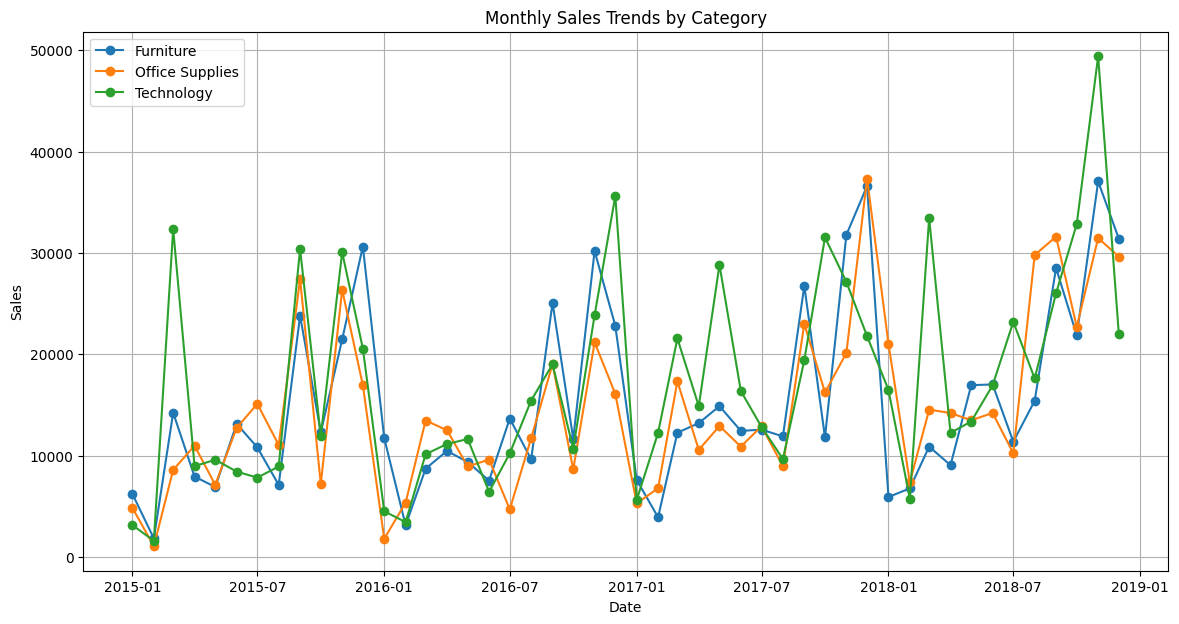

In [33]:
data['Order Year-Month'] =data ['Order Date'].dt.to_period('M')
monthly_sales_by_category = data.pivot_table(values='Sales', index='Order Year-Month', columns='Category', aggfunc='sum').fillna(0)
plt.figure(figsize=(14, 7))
for category in monthly_sales_by_category.columns:
    plt.plot(monthly_sales_by_category.index.to_timestamp(), monthly_sales_by_category[category], marker='o', linestyle='-', label=category)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends by Category')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
monthly_sales_by_category

Category,Furniture,Office Supplies,Technology
Order Year-Month,,,
2015-01,6217.2770,4845.140,3143.290
2015-02,1839.6580,1071.724,1608.510
2015-03,14243.3680,8602.455,32359.974
2015-04,7944.8370,10988.874,8973.144
2015-05,6912.7870,7131.640,9599.876
2015-06,13144.5816,12742.389,8435.965
2015-07,10821.0510,15121.208,7839.284
2015-08,7125.2105,11055.276,8937.050
2015-09,23816.4808,27423.298,30383.748


In [35]:
monthly_sales_by_Subcategory = data.pivot_table(values = 'Sales', index = 'Order Year-Month', columns = 'Sub-Category', aggfunc = 'sum' ).fillna(0)
monthly_sales_by_Subcategory

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order Year-Month,,,,,,,,,,,,,,,,,
2015-01,827.890,312.580,176.990,814.508,1010.0550,4187.700,0.000,194.360,31.120,686.522,44.746,0.000,242.020,2315.400,3028.816,0.000,333.0000
2015-02,1120.990,89.920,73.664,339.262,0.0000,190.458,0.000,0.000,12.350,392.980,36.876,0.000,138.488,487.520,142.544,238.620,1256.2200
2015-03,957.734,502.962,413.268,1525.675,1706.4460,5713.142,0.000,353.200,48.240,480.128,173.590,25314.658,1196.898,6087.582,4370.002,18.620,6343.6520
2015-04,2323.700,532.580,528.236,870.392,308.4990,3210.666,0.000,397.192,101.684,984.046,78.992,287.968,625.432,6361.476,3680.012,4174.354,3441.6260
2015-05,695.490,918.596,288.220,4372.304,640.6310,3675.109,2999.930,214.194,12.576,780.166,57.440,0.000,475.128,5904.456,712.902,80.280,1816.8810
2015-06,667.040,2275.246,686.112,4275.793,759.5736,6456.001,0.000,95.560,45.292,371.206,591.790,691.761,1028.174,7077.164,3716.818,27.604,5557.8010
2015-07,3308.692,81.740,256.040,2934.492,1487.6730,6364.940,559.992,136.864,24.348,902.622,194.790,0.000,796.332,3970.600,2452.732,8243.870,2065.8160
2015-08,1665.124,1943.843,203.662,4173.051,794.2760,2395.106,1749.966,203.332,85.870,997.758,41.376,0.000,1924.444,5521.960,2322.730,156.968,2938.0705
2015-09,2305.734,2413.264,759.860,12743.616,2394.4698,13849.185,1799.970,381.372,95.478,2960.956,381.536,22420.282,1445.358,3857.762,8810.224,392.590,4611.8700


In [36]:
monthly_sales_by_Subcategory.columns

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='Sub-Category')

In [37]:
len(monthly_sales_by_Subcategory.columns)

17

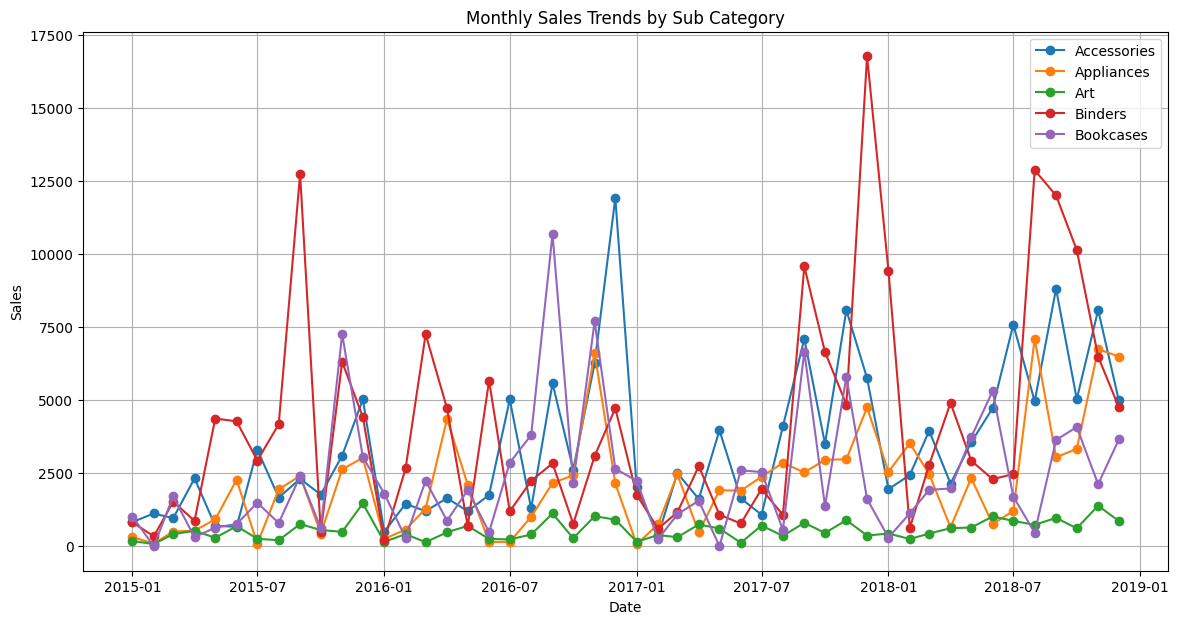

In [38]:
plt.figure(figsize = (14,7))
for sub_category in monthly_sales_by_Subcategory.columns[:5]:
    plt.plot(monthly_sales_by_Subcategory.index.to_timestamp(), monthly_sales_by_Subcategory[sub_category], marker = 'o', linestyle = "-", label = sub_category)
    plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends by Sub Category')
plt.legend()
plt.grid(True)
plt.show()
plt.show()


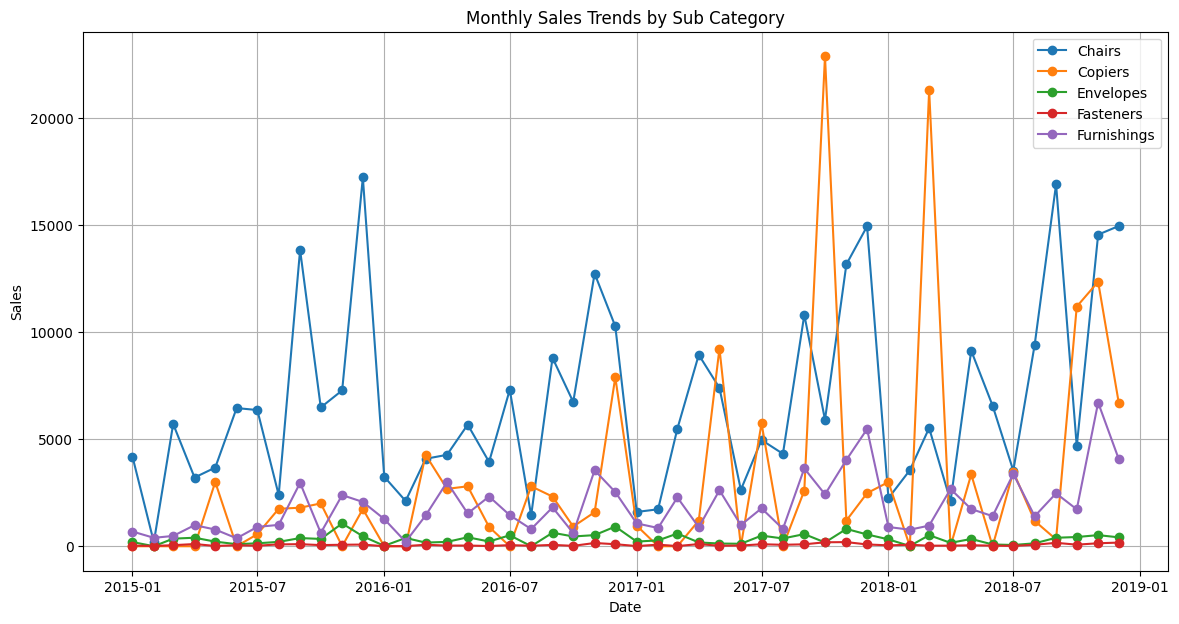

In [39]:
plt.figure(figsize = (14,7))
for sub_category in monthly_sales_by_Subcategory.columns[5:10]:
    plt.plot(monthly_sales_by_Subcategory.index.to_timestamp(), monthly_sales_by_Subcategory[sub_category], marker = 'o', linestyle = "-", label = sub_category)
    plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends by Sub Category')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

In [40]:
data['Sales'].mean()

230.7690594591837

In [41]:
ship_mode_counts  = data['Ship Mode'].value_counts()
ship_mode_percentages = (ship_mode_counts / ship_mode_counts.sum()) * 100
ship_mode_summary = pd.DataFrame({'Count': ship_mode_counts, 'Percentage': ship_mode_percentages})
ship_mode_summary

,Count,Percentage
Ship Mode,,
Standard Class,5859,59.785714
Second Class,1902,19.408163
First Class,1501,15.316327
Same Day,538,5.489796


In [42]:
ship_mode_category_counts = data.groupby(['Category', 'Ship Mode']).size().unstack(fill_value=0)
ship_mode_category_percentages = ship_mode_category_counts.div(ship_mode_category_counts.sum(axis=1), axis=0) * 100
ship_mode_category_summary = pd.concat([ship_mode_category_counts, ship_mode_category_percentages], axis=1, keys=['Count', 'Percentage'])
ship_mode_category_summary


Count                                       Percentage  \
Ship Mode       First Class Same Day Second Class Standard Class First Class   
Category                                                                       
Furniture               318      118          414           1228   15.303176   
Office Supplies         886      323         1129           3571   14.994077   
Technology              297       97          359           1060   16.381688   

                                                       
Ship Mode        Same Day Second Class Standard Class  
Category                                               
Furniture        5.678537    19.923003      59.095284  
Office Supplies  5.466238    19.106448      60.433237  
Technology       5.350248    19.801434      58.466630

In [43]:
sales_by_order_date = data.groupby('Order Date')['Sales'].sum().reset_index()


sales_by_ship_date = data.groupby('Ship Date')['Sales'].sum().reset_index()

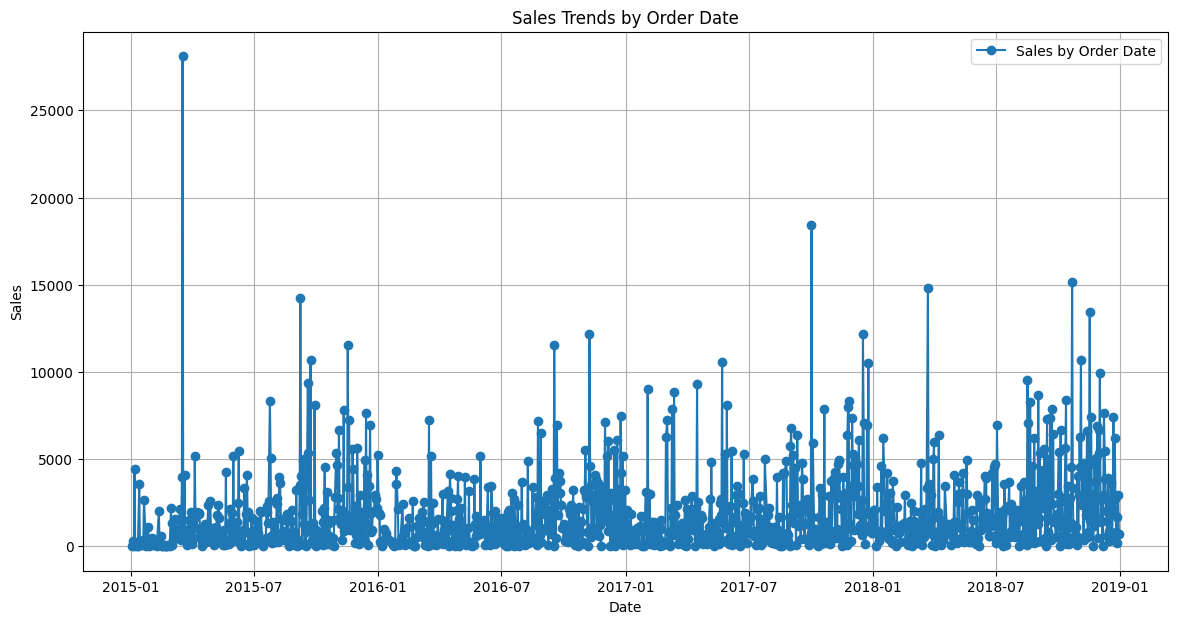

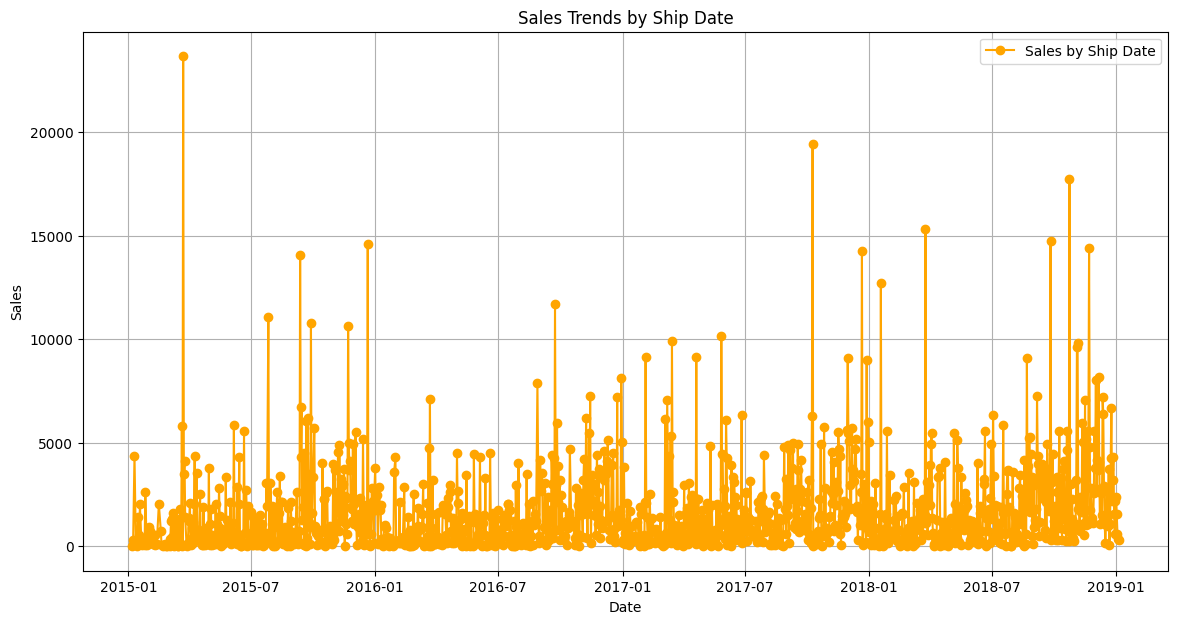

In [44]:
import matplotlib.pyplot as plt

# Plot sales trends by Order Date
plt.figure(figsize=(14, 7))
plt.plot(sales_by_order_date['Order Date'], sales_by_order_date['Sales'], marker='o', linestyle='-', label='Sales by Order Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends by Order Date')
plt.legend()
plt.grid(True)
plt.show()

# Plot sales trends by Ship Date
plt.figure(figsize=(14, 7))
plt.plot(sales_by_ship_date['Ship Date'], sales_by_ship_date['Sales'], marker='o', linestyle='-', color='orange', label='Sales by Ship Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends by Ship Date')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [46]:
!pip3 install prophet


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 1.7 MB/s eta 0:00:000m eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.5 MB/s eta 0:00:001.5 MB/s eta 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 3.5 MB/s eta 0:00:00


In [45]:
data.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month',
       'Delivery Time (Days)', 'Repeat Customer', 'Order Year-Month'],
      dtype='object')

In [47]:
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable


In [48]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month',
       'Delivery Time (Days)', 'Repeat Customer', 'Order Year-Month'],
      dtype='object')

In [49]:
sales_by_order_date = data.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_order_date.columns = ['ds', 'y']

In [50]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
from prophet import Prophet


pip install plotly


In [53]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
model = Prophet()
model.fit(sales_by_order_date)
future = model.make_future_dataframe(periods = 7)
forecast = model.predict(future)


18:59:46 - cmdstanpy - INFO - Chain [1] start processing
18:59:46 - cmdstanpy - INFO - Chain [1] done processing


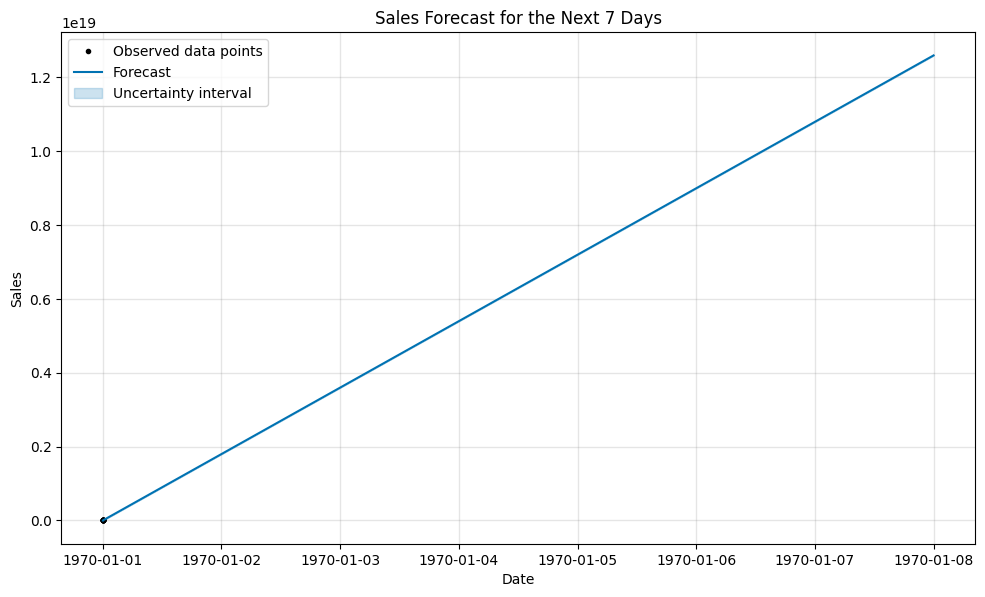

,ds,yhat,yhat_lower,yhat_upper
12,1970-01-02 00:00:00.000000012,1.798953e+18,1.798953e+18,1.798953e+18
13,1970-01-03 00:00:00.000000012,3.597907e+18,3.597907e+18,3.597907e+18
14,1970-01-04 00:00:00.000000012,5.396860e+18,5.396860e+18,5.396860e+18
15,1970-01-05 00:00:00.000000012,7.195814e+18,7.195813e+18,7.195814e+18
16,1970-01-06 00:00:00.000000012,8.994767e+18,8.994767e+18,8.994767e+18
17,1970-01-07 00:00:00.000000012,1.079372e+19,1.079372e+19,1.079372e+19
18,1970-01-08 00:00:00.000000012,1.259267e+19,1.259267e+19,1.259267e+19


In [56]:
fig = model.plot(forecast)
plt.title('Sales Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Sales')
plt.show()

# Display the forecasted sales for the next 7 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [60]:
sales_by_order_date['ds'] = pd.to_datetime(sales_by_order_date['ds'])

# Split the data into training and validation sets
train = sales_by_order_date[sales_by_order_date['ds'] < '2018-12-01']
validation = sales_by_order_date[sales_by_order_date['ds'] >= '2018-12-01']

In [61]:
model = Prophet()
model.fit(train)


19:08:08 - cmdstanpy - INFO - Chain [1] start processing
19:08:08 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
future = model.make_future_dataframe(periods = len(validation))
forecast = model.predict(future)

In [63]:
forecast_validation = forecast[['ds','yhat']].iloc[-len(validation):].reset_index(drop = True)
validation = validation.reset_index(drop=True)


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [65]:
mae = mean_absolute_error(validation['y'], forecast_validation['yhat'])
rmse = np.sqrt(mean_squared_error(validation['y'], forecast_validation['yhat']))

ValueError: Found input variables with inconsistent numbers of samples: [0, 12]

In [70]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2059.910120283228
Root Mean Squared Error (RMSE): 2485.510946848358


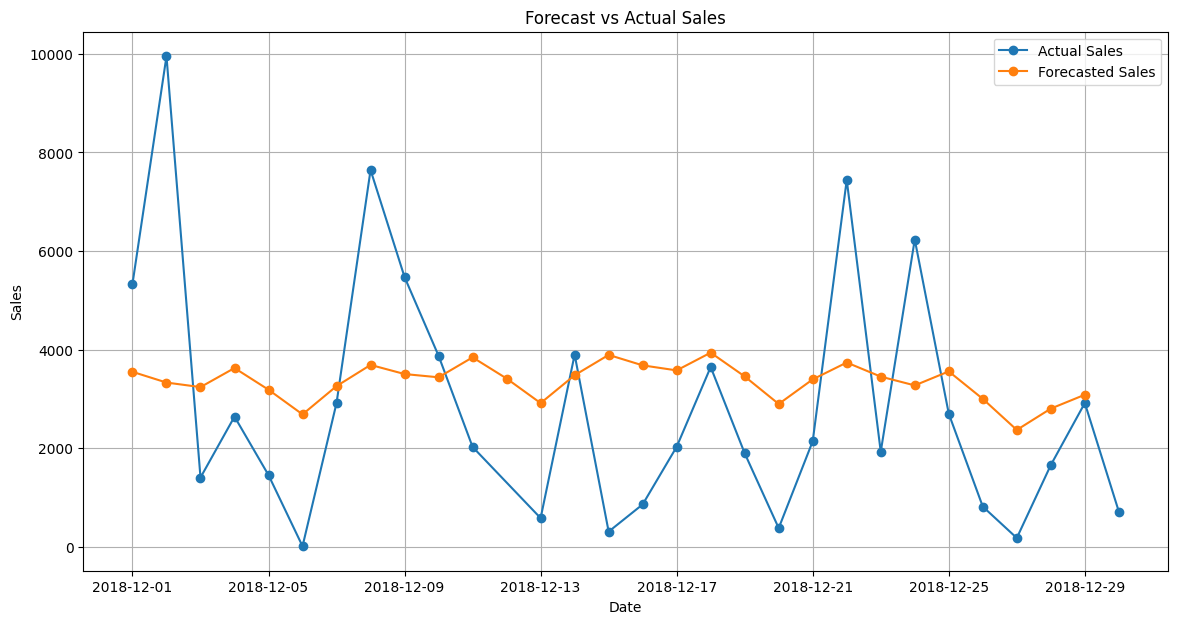

In [71]:
plt.figure(figsize=(14, 7))
plt.plot(validation['ds'], validation['y'], marker='o', linestyle='-', label='Actual Sales')
plt.plot(forecast_validation['ds'], forecast_validation['yhat'], marker='o', linestyle='-', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecast vs Actual Sales')
plt.legend()
plt.grid(True)
plt.show()

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

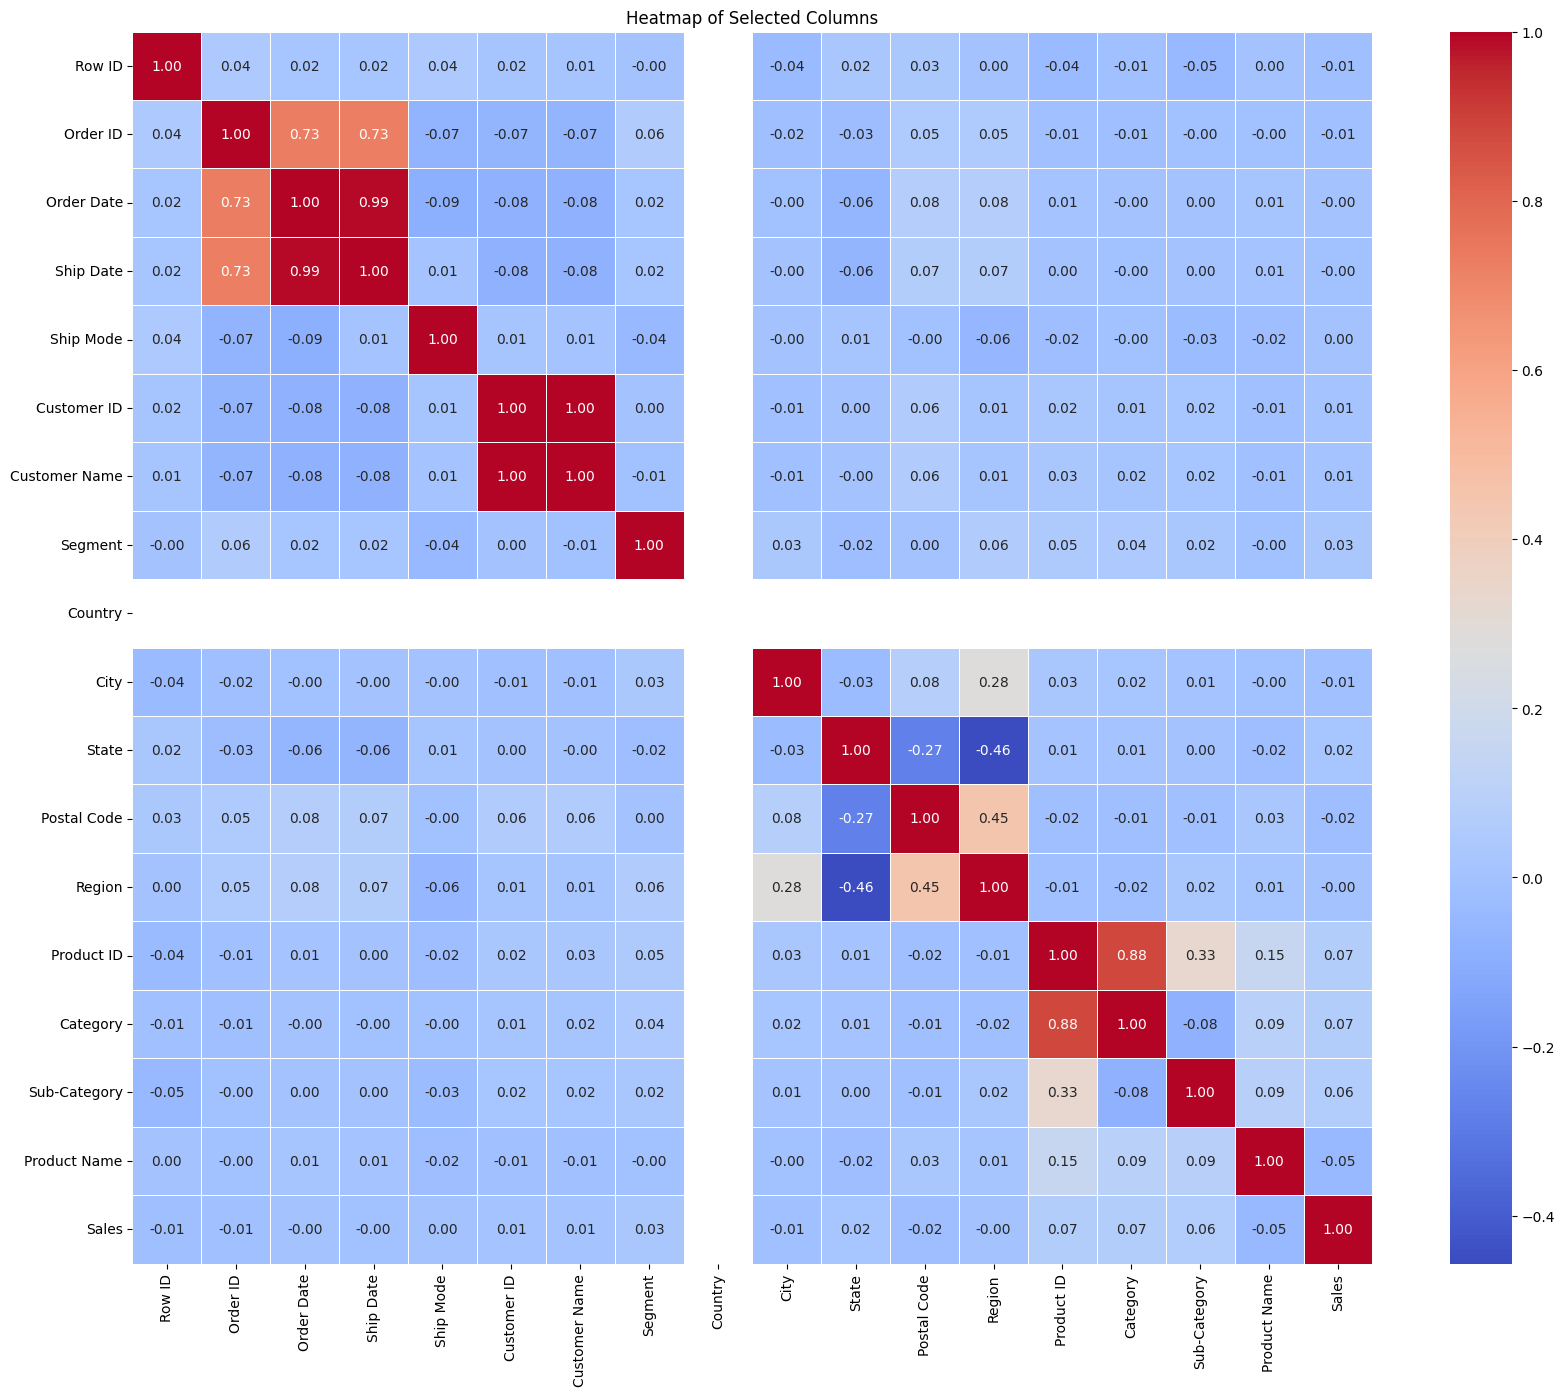

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('train.csv.zip')


# Selecting relevant columns for the heatmap
columns = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
           'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
           'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
           'Product Name', 'Sales']

heatmap_data = data[columns]

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 
               'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']:
    heatmap_data[column] = label_encoder.fit_transform(heatmap_data[column].astype(str))

# Ensure 'Postal Code' is numeric
heatmap_data['Postal Code'] = pd.to_numeric(heatmap_data['Postal Code'], errors='coerce')

# Convert date columns to datetime
heatmap_data['Order Date'] = pd.to_datetime(heatmap_data['Order Date'], errors='coerce')
heatmap_data['Ship Date'] = pd.to_datetime(heatmap_data['Ship Date'], errors='coerce')

# Drop rows with NaN values if any
heatmap_data = heatmap_data.dropna()

# Calculate the correlation matrix
corr = heatmap_data.corr()

# Generate a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()
